In [1]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')
no_smile = '/content/drive/MyDrive/Image Data/archive (1)/non_smile'
smile = '/content/drive/MyDrive/Image Data/archive (1)/smile'
test = '/content/drive/MyDrive/Image Data/archive (1)/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


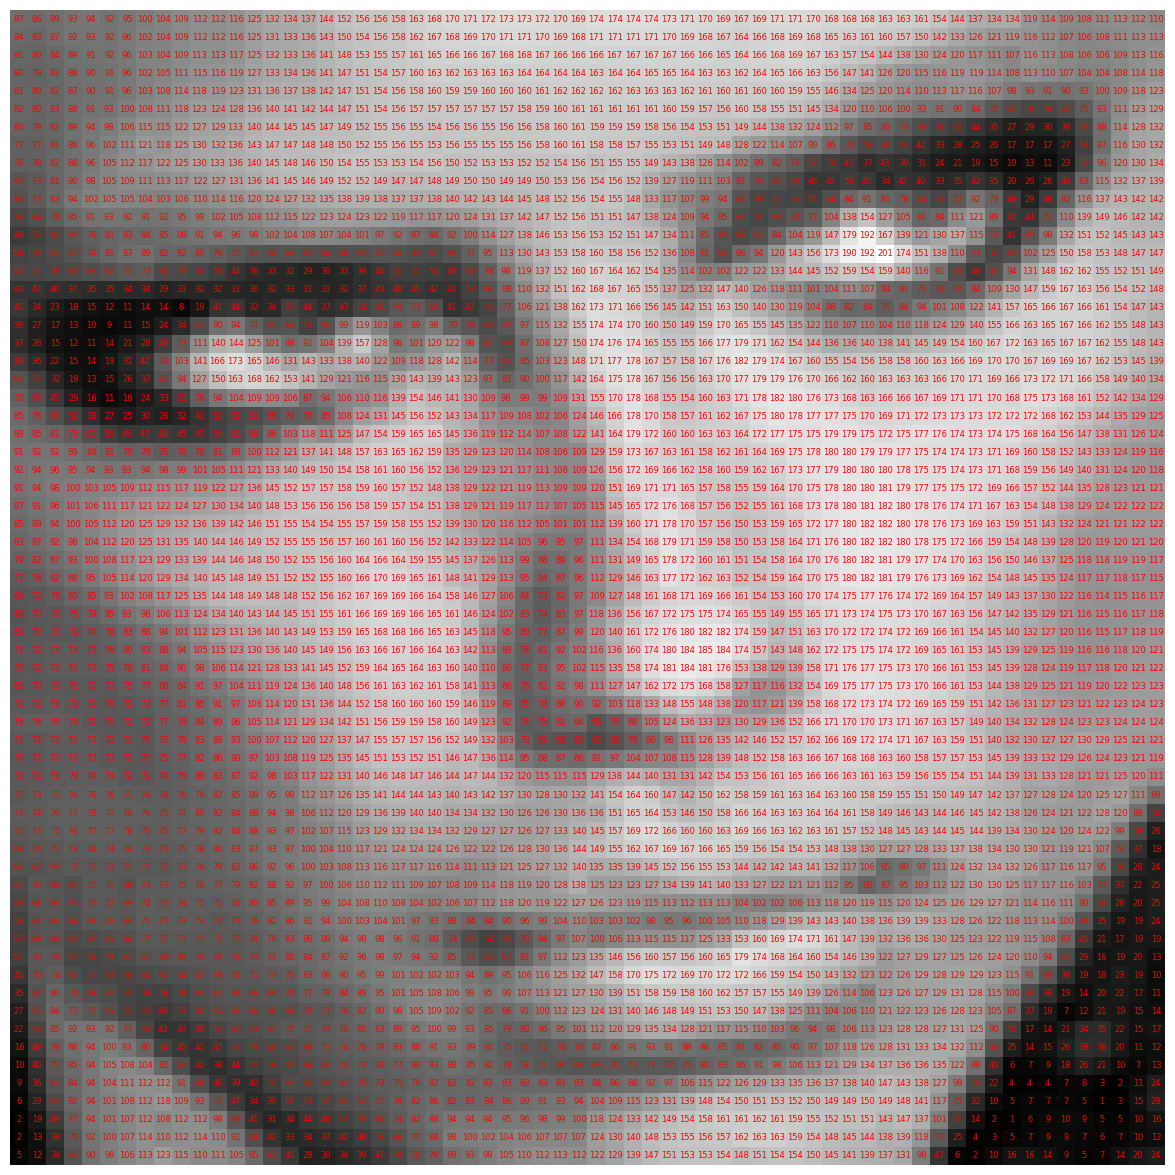

In [3]:
#Data Cleaning
import glob
import os

# The variable 'no_smile' currently holds the directory path.
# We need to get actual image file paths from within that directory.
# Assuming images are in .jpg format, adjust the pattern if they are .png, etc.
image_files = []
for ext in ('*.jpg', '*.jpeg', '*.png'):
    image_files.extend(glob.glob(os.path.join(no_smile, ext)))

if not image_files:
    print(f"No image files found in the directory: {no_smile}. Please check the path and file types.")
elif len(image_files) <= 22:
    print(f"Not enough image files found in '{no_smile}'. Found {len(image_files)} files, but trying to access index 22.")
else:
    # Open the 23rd image (index 22) from the list
    pic1 = Image.open(image_files[22]).convert("L")
    pic1.size
    pixel_array = np.array(pic1)
    plt.figure(figsize=(15, 15))
    plt.imshow(pixel_array, cmap="gray", interpolation="nearest")

    # Show pixel values overlaid on image
    # Ensure pixel_array has dimensions 64x64 or adjust loop bounds if images are different sizes
    display_rows = min(64, pixel_array.shape[0])
    display_cols = min(64, pixel_array.shape[1])

    for i in range(display_rows):
        for j in range(display_cols):
            plt.text(j, i, pixel_array[i, j], ha="center", va="center", fontsize=6, color="red")

    plt.axis("off")
    plt.show()

In [4]:
data = []
labels = []

import glob
import os

# Get list of image files for smiling images
smile_image_files = []
for ext in ('*.jpg', '*.jpeg', '*.png'): # Include common image extensions
    smile_image_files.extend(glob.glob(os.path.join(smile, ext)))

# Get list of image files for non-smiling images
no_smile_image_files = []
for ext in ('*.jpg', '*.jpeg', '*.png'): # Include common image extensions
    no_smile_image_files.extend(glob.glob(os.path.join(no_smile, ext)))

if not smile_image_files:
    print(f"Warning: No smiling image files found in {smile}. Please check the path and file types.")
if not no_smile_image_files:
    print(f"Warning: No non-smiling image files found in {no_smile}. Please check the path and file types.")

# Load Smiling Images
for img_name in smile_image_files:
    try:
        img = Image.open(img_name).convert("L")  # Convert to grayscale
        img_array = np.array(img).flatten()  # Flatten to 1D array
        data.append(img_array)
        labels.append(1)  # 1 = Smiling
    except Exception as e:
        print(f"Error loading smiling image {img_name}: {e}")

# Load Non-Smiling Images
for img_name in no_smile_image_files:
    try:
        img = Image.open(img_name).convert("L")  # Convert to grayscale
        img_array = np.array(img).flatten()  # Flatten to 1D array
        data.append(img_array)
        labels.append(0)  # 0 = Non-Smiling
    except Exception as e:
        print(f"Error loading non-smiling image {img_name}: {e}")

In [6]:
len(data)
#type(data[0])
#type(labels[0])

1203

In [7]:
X = np.array(data)  # Features (image pixels)
y = np.array(labels)  # Labels (0 or 1)
# 📌 Normalize pixel values (0 to 1)
# X = X / 255.0
X,y = shuffle(X,y,random_state=42)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 📌 Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
LogisticRegression()

LogisticRegression()

In [9]:
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [10]:
model.predict_proba(X_test)

array([[0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.16359667e-237],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.30909150e-126],
       [5.69736533e-001, 4.30263467e-001],
       [1.00000000e+000, 2.64381835e-130],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.68523441e-078],
       [1.00000000e+000, 1.31237056e-142],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.06277648e-110],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.0

In [11]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8548
Confusion Matrix:
 [[102  21]
 [ 14 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       123
           1       0.83      0.88      0.86       118

    accuracy                           0.85       241
   macro avg       0.86      0.86      0.85       241
weighted avg       0.86      0.85      0.85       241



# New Section

In [13]:
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}
log_reg = LogisticRegression()
cv = StratifiedKFold()
# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             scoring='accuracy')

In [14]:
grid_search.best_params_
grid_search.best_score_
tuned_model = grid_search.best_estimator_

In [15]:
y_pred = tuned_model.predict(X_test_scaled)
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8714
Confusion Matrix:
 [[104  19]
 [ 12 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       123
           1       0.85      0.90      0.87       118

    accuracy                           0.87       241
   macro avg       0.87      0.87      0.87       241
weighted avg       0.87      0.87      0.87       241



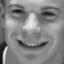

In [21]:
import pickle
import os # Import os for path joining
pickle.dump(tuned_model, open('smile_stalker.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
# Open the test image
image = Image.open(os.path.join(test, "Timothy_Goebel_0001.jpg")).convert("L")
resized_image = image.resize((64, 64))
resized_image

In [24]:
!pip install gradio

In [23]:
img_array = np.array(resized_image).flatten()
sc = scaler.transform(img_array.reshape(1,-1))
prediction_proba = tuned_model.predict_proba(sc)
prediction_proba

array([[0.50110622, 0.49889378]])

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
import pickle
import os

# Load the pre-trained model and scaler
# Ensure these files are in the expected location or provide their full paths
with open('smile_stalker.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

def predict_smile(image_path):
    if image_path is None:
        return "No image provided."

    # Open and preprocess the image
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img = img.resize((64, 64))  # Resize to 64x64 pixels
    img_array = np.array(img).flatten()  # Flatten to 1D array

    # Scale the image array
    img_scaled = loaded_scaler.transform(img_array.reshape(1, -1))

    # Make prediction
    prediction_proba = loaded_model.predict_proba(img_scaled)[0]
    # The first element is probability of no smile (0), second is smile (1)
    no_smile_proba = prediction_proba[0]
    smile_proba = prediction_proba[1]

    if smile_proba > no_smile_proba:
        return f"Smile: {smile_proba*100:.2f}% (Predicted: Smile)"
    else:
        return f"No Smile: {no_smile_proba*100:.2f}% (Predicted: No Smile)"

# Create Gradio interface
# Inputs: Image uploader
# Outputs: Text label for prediction
interface = gr.Interface(
    fn=predict_smile,
    inputs=gr.Image(type="filepath", label="Upload an Image"),
    outputs=gr.Label(label="Prediction"),
    title="Smile Stalker: Smile Detection",
    description="Upload an image to predict if the person is smiling or not.",
    examples=[os.path.join(test, "Timothy_Goebel_0001.jpg")] # Example from your test set
)

# Launch the interface
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a54fbb249557cbba2b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Task
Create a Gradio application file named `app.py` that includes loading the trained model and scaler, defining a prediction function, and launching the Gradio interface for image-based smile detection.

## Create Gradio App File (app.py)

### Subtask:
Generate a new code cell containing the full Gradio application code (app.py). This file will include loading the pickled model and scaler, defining the `predict_smile` function, and setting up and launching the Gradio interface. This file will be saved to disk.


**Reasoning**:
I need to create a new code cell and use the `%%writefile` magic command to save the Gradio application code to a file named `app.py`. The content of this file will be copied from the existing cell `ad9e3757`.



In [ ]:
%%writefile app.py

import gradio as gr
import numpy as np
from PIL import Image
import pickle
import os

# Load the pre-trained model and scaler
# Ensure these files are in the expected location or provide their full paths
with open('smile_stalker.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

def predict_smile(image_path):
    if image_path is None:
        return "No image provided."

    # Open and preprocess the image
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img = img.resize((64, 64))  # Resize to 64x64 pixels
    img_array = np.array(img).flatten()  # Flatten to 1D array

    # Scale the image array
    img_scaled = loaded_scaler.transform(img_array.reshape(1, -1))

    # Make prediction
    prediction_proba = loaded_model.predict_proba(img_scaled)[0]
    # The first element is probability of no smile (0), second is smile (1)
    no_smile_proba = prediction_proba[0]
    smile_proba = prediction_proba[1]

    if smile_proba > no_smile_proba:
        return f"Smile: {smile_proba*100:.2f}% (Predicted: Smile)"
    else:
        return f"No Smile: {no_smile_proba*100:.2f}% (Predicted: No Smile)"

# Create Gradio interface
# Inputs: Image uploader
# Outputs: Text label for prediction
interface = gr.Interface(
    fn=predict_smile,
    inputs=gr.Image(type="filepath", label="Upload an Image"),
    outputs=gr.Label(label="Prediction"),
    title="Smile Stalker: Smile Detection",
    description="Upload an image to predict if the person is smiling or not.",
    examples=["/content/drive/MyDrive/Image Data/archive (1)/test/Timothy_Goebel_0001.jpg"] # Example from your test set
)

# Launch the interface
interface.launch(debug=True)